# Data Visualization

## Objectives

**Business Requirements Statement:**

The business requires the development of a dashboard to visually differentiate between healthy cherry leaves and those infected with powdery mildew. Additionally, the client aims to implement a predictive model capable of determining the overall health status of cherry trees, specifically identifying whether a tree is healthy or affected by powdery mildew. This initiative is intended to streamline the current manual inspection process, enhance efficiency, and potentially serve as a scalable solution for other crops within Farmy & Foods, contingent upon the success of the cherry leaf analysis project.


## Inputs

* inputs/cherry_leaves_dataset/cherry_leaves/train
* inputs/cherry_leaves_dataset/cherry_leaves/test
* inputs/cherry_leaves_dataset/cherry_leaves/validation

## Outputs

* Image shape embeddings pickle file.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between infected and uninfected leaf images.
* Generate code that answers business requirements and can be used to build an image montage on the Streamlit dashboard.

## Imports

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
import itertools
import random
import shutil
sns.set_style("white")

## Check/Set the working directory

In [2]:
expected_parent_dir = ("/workspace/cherry-leaves-mildew-detector-project-5/")

current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

parent_basename = os.path.basename(os.path.abspath(
    os.path.join(current_dir, os.pardir)))

if parent_basename != expected_parent_dir:
    os.chdir(expected_parent_dir)
    print(f"Changed to the expected parent directory: {expected_parent_dir}")
else:
    print(f"Already in the expected parent directory: {parent_basename}")

current_dir = os.getcwd()
print(f"Current directory: {current_dir}")


Current directory: /workspace/cherry-leaves-mildew-detector-project-5/jupyter_notebooks
Changed to the expected parent directory: /workspace/cherry-leaves-mildew-detector-project-5/
Current directory: /workspace/cherry-leaves-mildew-detector-project-5


## Set input directories

In [3]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'


## Set/Create output directories

In [8]:
version = 'v1'
file_path = f'outputs/{version}'

outputs_dir = os.path.join(current_dir, 'outputs')

if 'outputs' in os.listdir(current_dir) and version in os.listdir(outputs_dir):
    print("Old version exists; removing, creating a new version")
    old_version_path = os.path.join(outputs_dir, version)
    shutil.rmtree(old_version_path)
    os.makedirs(name=file_path)
else:
    print("No old version exists; creating a new version")
    os.makedirs(name=file_path)

Old version exists; removing, creating a new version


## Set labels

In [9]:
labels = os.listdir(train_path)
print('Image labels: ',labels)


Image labels:  ['healthy', 'powdery_mildew']


## Data visualisation of image data

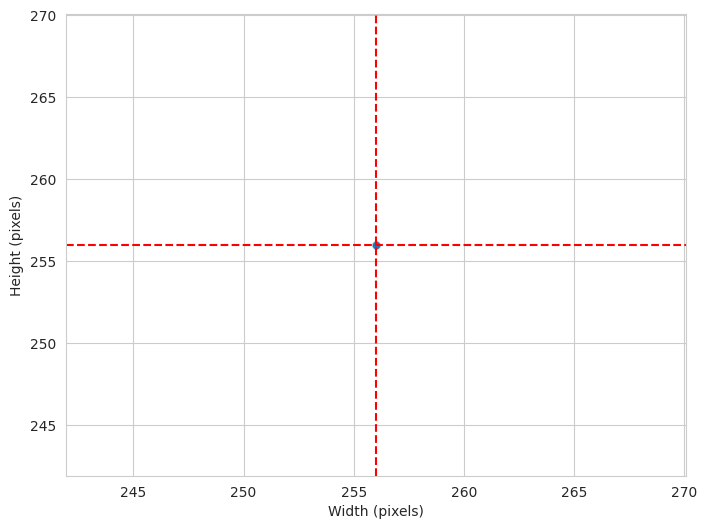

Width average: 256
Height average: 256


In [10]:
dim1, dim2 = [], []

for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        img = imread(os.path.join(train_path, label, image_filename))
        d1, d2, _ = img.shape
        dim1.append(d1)
        dim2.append(d2)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
dim1_mean, dim2_mean = int(np.mean(dim1)), int(np.mean(dim2))
plt.axvline(x=dim1_mean, color='r', linestyle='--')
plt.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()

print(f"Width average: {dim2_mean}\nHeight average: {dim1_mean}")


In [11]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape


(256, 256, 3)

In [12]:
joblib.dump(image_shape, f"{file_path}/image_shape.pkl")


['outputs/v1/image_shape.pkl']

## Average and variability of images per label

Funtion to load images into an array

In [13]:
def load_image_as_array(my_data_dir, new_size=(30, 30),
                        n_images_per_label=20):
    """
    Load images from the specified directory
    and resize them to the given dimensions.

    Parameters:
    - my_data_dir (str): The path to the
    directory containing labeled
    subdirectories of images.
    - new_size (tuple): The target size for
    the images in the format (height, width).
    - n_images_per_label (int): The maximum
    number of images to load per label.

    Returns:
    - X (numpy.ndarray): Array of resized
    images.
    - y (numpy.ndarray): Array of
    corresponding labels.
    """
    X, y = [], []
    labels = os.listdir(my_data_dir)

    for label in labels:
        label_path = os.path.join(my_data_dir, label)

        for image_filename in os.listdir(label_path)[:n_images_per_label]:
            image_path = os.path.join(label_path, image_filename)

            img = image.load_img(image_path, target_size=new_size)
            img_resized = image.img_to_array(img) / 255.0

            X.append(img_resized)
            y.append(label)

    return np.array(X), np.array(y)


X, y = load_image_as_array(train_path, image_shape, 20)
print(X.shape, y.shape)


(40, 256, 256, 3) (40,)


## Visualize and Save Mean and Variability of Images per Label

==== Label healthy ====
Image Shape: (256, 256, 3)
==== Label powdery_mildew ====
Image Shape: (256, 256, 3)


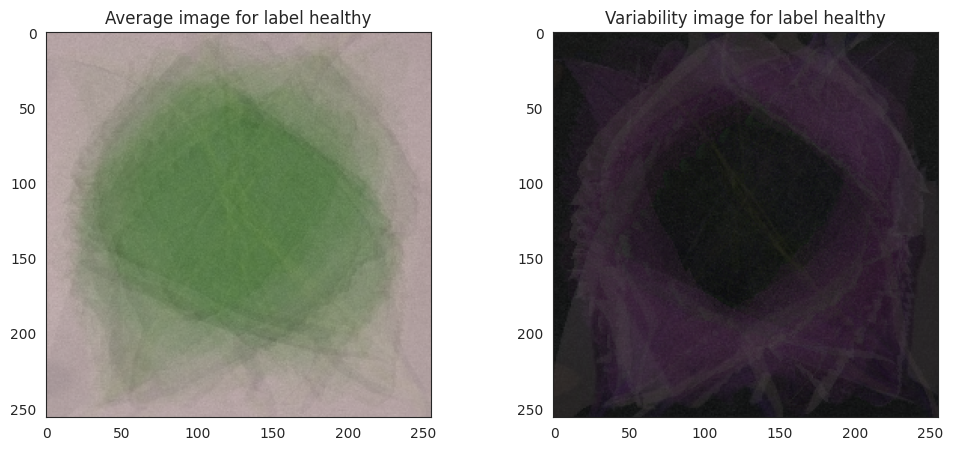

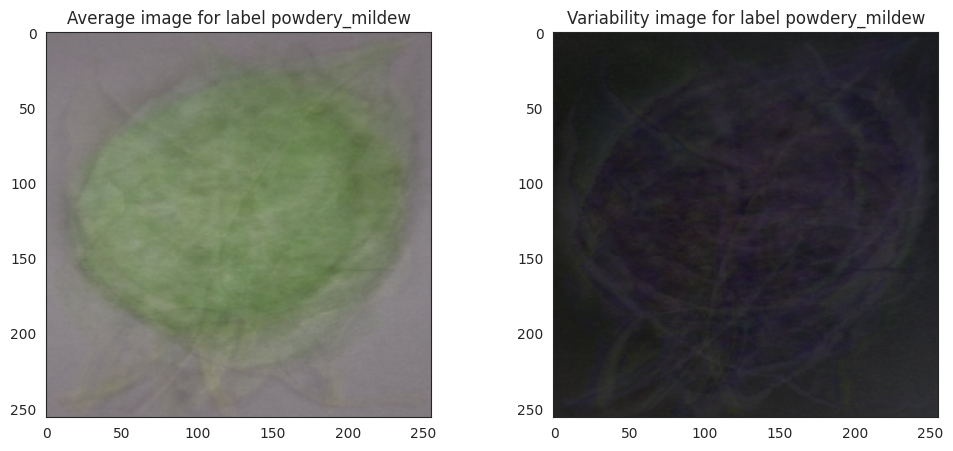

In [14]:
def plot_mean_variability_per_labels(X, y,
                                     figsize=(12, 5),
                                     save_image=False):
    """
    Visualize and Save Mean and Variability of Images
    per Label.

    Parameters:
    - X (numpy.ndarray): Array of
    resized images.
    - y (numpy.ndarray): Array of
    corresponding labels.
    - figsize (tuple): Size of the
    figure (width, height).
    - save_image (bool): Flag to
    save the images.

    Pseudo-code:
    - Loop over all unique labels
    - Subset an array for a given label
    - Calculate the mean and standard deviation
    - Create a figure displaying the mean and variability of images
    - Save the image if specified
    """

    for label_to_display in np.unique(y):
        sns.set_style("white")

        arr = X[y == label_to_display]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)

        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")

        fig, axes = plt.subplots(1, 2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")


plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)


## Difference between healthy and infected leaves


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


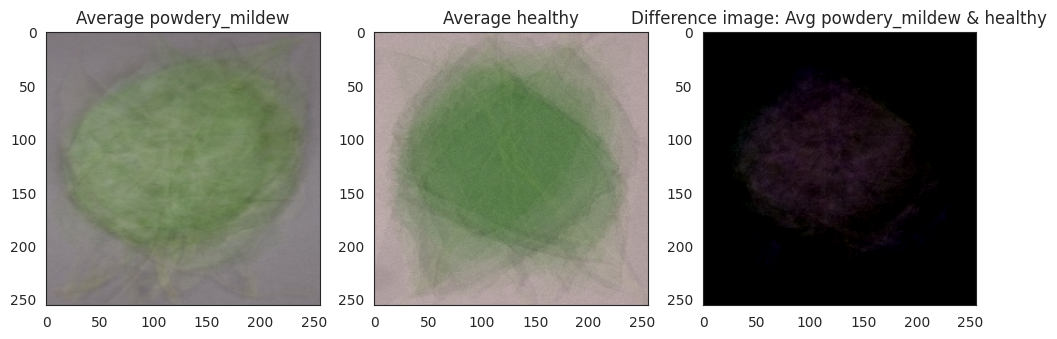

In [15]:
def subset_image_label(X, y, label_to_display):
    """
    Subset images based on a given label.

    Parameters:
    - X (numpy.ndarray): Array of resized images.
    - y (numpy.ndarray): Array of corresponding labels.
    - label_to_display (str): Label to subset images for.

    Returns:
    - df (numpy.ndarray): Subset of images for the specified label.
    """
    boolean_mask = (y == label_to_display).reshape(-1)
    return X[boolean_mask]


def diff_bet_avg_image_labels_data_as_array(X, y, label_1,
                                            label_2, figsize=(20, 5),
                                            save_image=False):
    """
    Calculate the difference between the average images of two labels
    and visualize the results.

    Parameters:
    - X (numpy.ndarray): Array of resized images.
    - y (numpy.ndarray): Array of corresponding labels.
    - label_1 (str): First label for comparison.
    - label_2 (str): Second label for comparison.
    - figsize (tuple): Size of the figure (width, height).
    - save_image (bool): Flag to save the image.

    Pseudo-code:
    - Subset images for label_1 and label_2
    - Calculate the average images for label_1 and label_2
    - Calculate the difference between the average images
    - Visualize the average images and the difference
    - Save the image if specified
    """
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(f"Either label {label_1} or label {label_2} "
              "is not in {np.unique(y)} ")
        return

    images_label_1 = subset_image_label(X, y, label_1)
    label_1_avg = np.mean(images_label_1, axis=0)

    images_label_2 = subset_image_label(X, y, label_2)
    label_2_avg = np.mean(images_label_2, axis=0)

    difference_mean = label_1_avg - label_2_avg
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    titles = [f'Average {label_1}', f'Average {label_2}',
              f'Difference image: Avg {label_1} & {label_2}']

    for i, (image_avg, title) in enumerate(zip([label_1_avg, label_2_avg,
                                                difference_mean], titles)):
        axes[i].imshow(image_avg, cmap='gray')
        axes[i].set_title(title)

    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()


diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='powdery_mildew',
                                        label_2='healthy',
                                        figsize=(12, 10),
                                        save_image=True
                                        )


## Image Montage

healthy


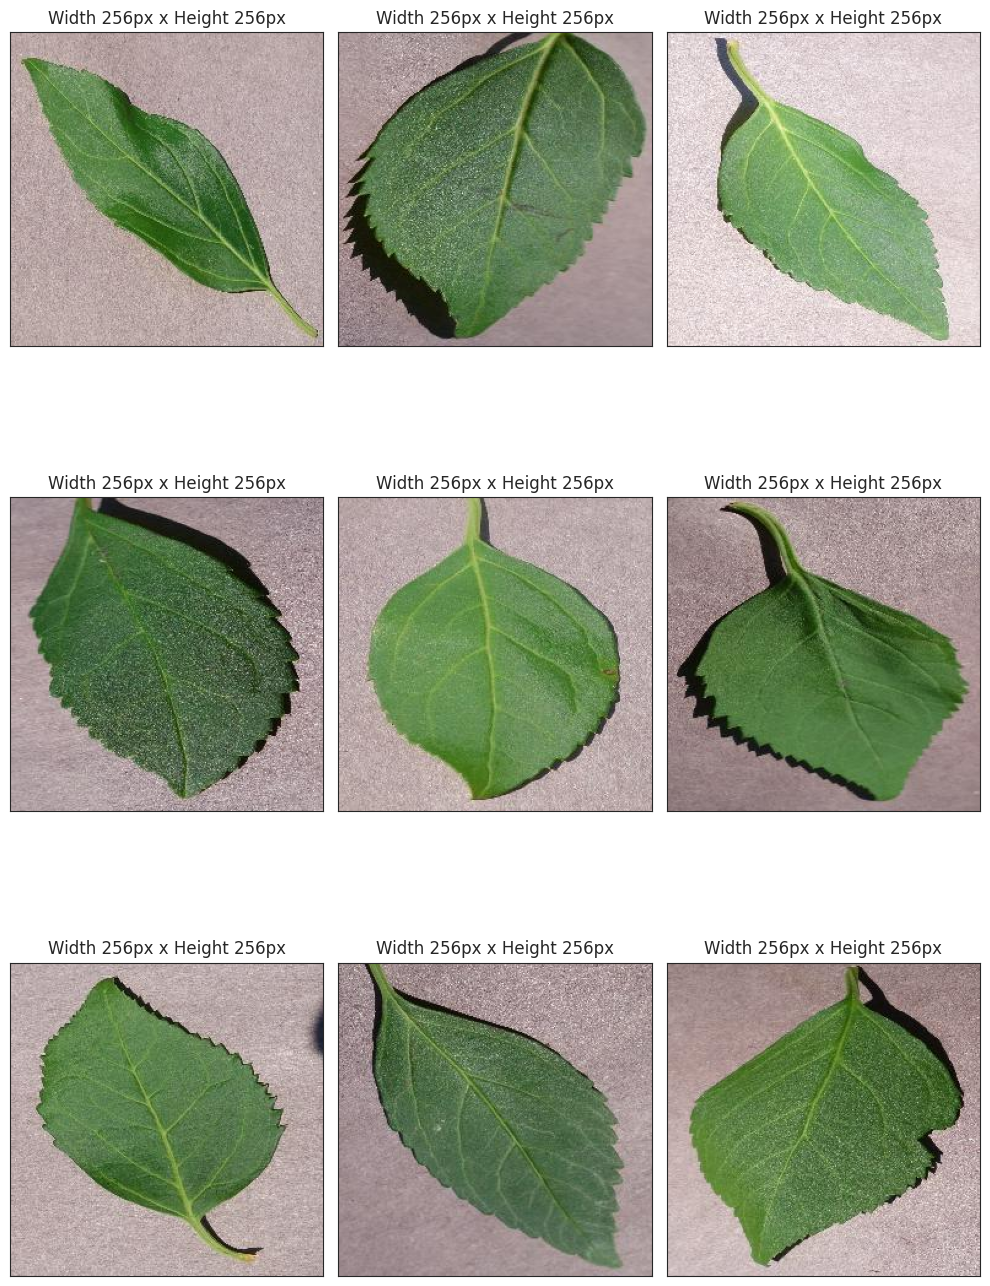

powdery_mildew


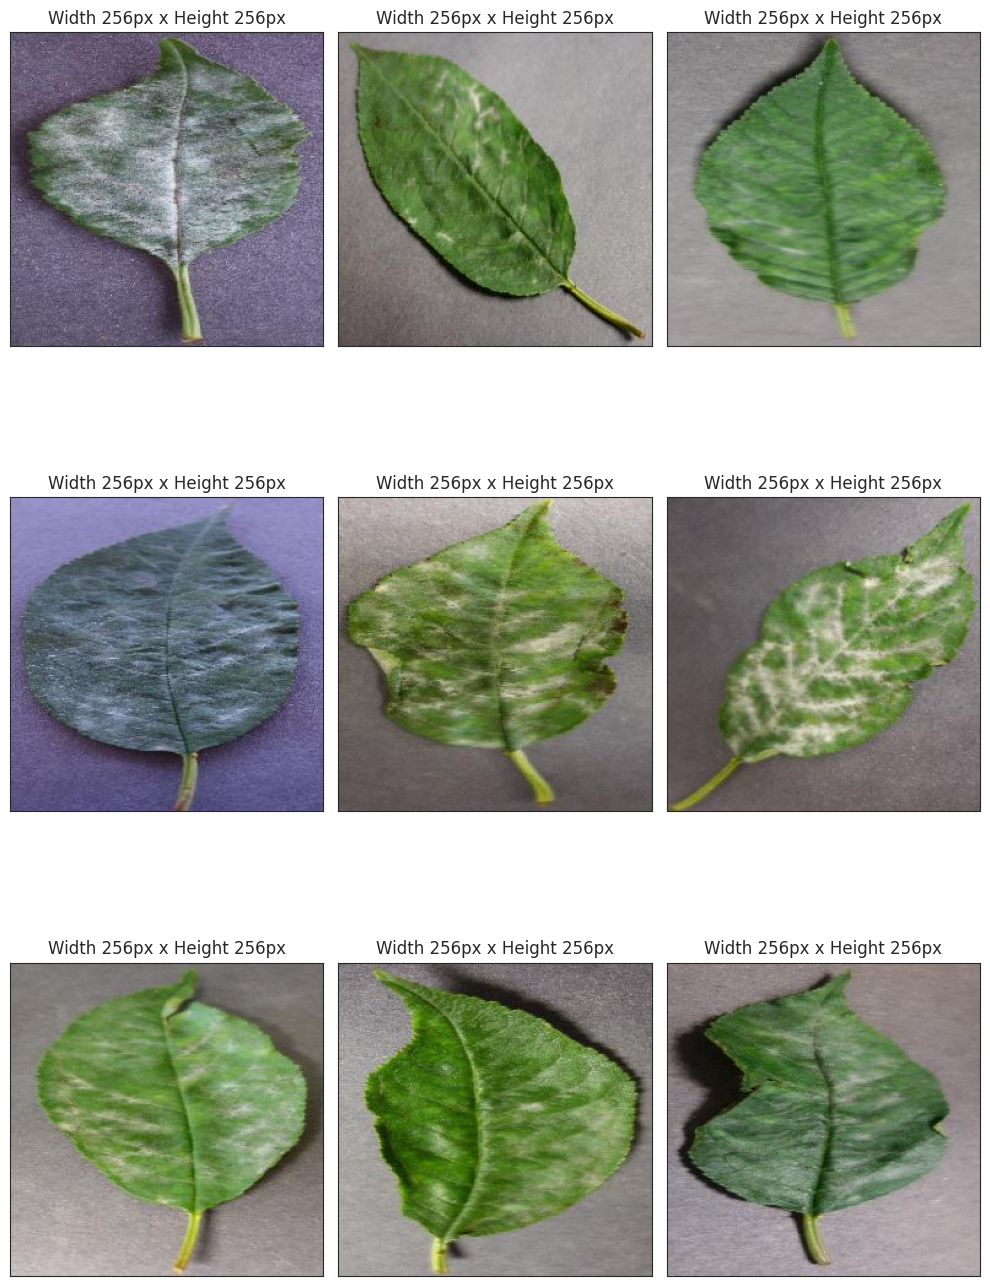

In [16]:
def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15, 10)):
    """
    Display a montage of random images for a specific label.

    Parameters:
    - dir_path (str): Directory path containing image labels.
    - label_to_display (str): Label for which to display the montage.
    - nrows (int): Number of rows in the montage grid.
    - ncols (int): Number of columns in the montage grid.
    - figsize (tuple): Size of the figure (width, height).

    Pseudo-code:
    - Subset the class you want to display
    - Check if the montage space is greater than subset size
    - Create a list of random image indices for the montage
    - Create a list of axes indices based on nrows and ncols
    - Create a Figure and display images with metadata
    """

    labels = os.listdir(dir_path)

    if label_to_display in labels:
        images_list = os.listdir(os.path.join(dir_path, label_to_display))

        if nrows * ncols < len(images_list):
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            print(f"Decrease nrows or ncols to create montage. "
                  f"There are {len(images_list)} images in subset. "
                  f"You requested a montage with {nrows * ncols} spaces")
            return

        list_rows = range(nrows)
        list_cols = range(ncols)
        plot_idx = list(itertools.product(list_rows, list_cols))

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for x, (row, col) in enumerate(plot_idx):
            img_path = os.path.join(dir_path, label_to_display, img_idx[x])
            img = imread(img_path)
            img_shape = img.shape

            axes[row, col].imshow(img)
            axes[row, col].set_title(
                f"Width {img_shape[1]}px x Height {img_shape[0]}px")
            axes[row, col].set_xticks([])
            axes[row, col].set_yticks([])

        plt.tight_layout()
        plt.show()
    else:
        print("The label you selected doesn't exist.")
        print(f"The existing options are: {labels}")


for label in os.listdir(train_path):
    print(label)
    image_montage(dir_path=train_path, label_to_display=label,
                  nrows=3, ncols=3, figsize=(10, 15))
